In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Lambda
from torchvision import transforms
from torch.distributions import Normal
from torchvision.utils import save_image
import time
import tqdm
import matplotlib.pyplot as plt
import models
import numpy as np
from numpy.random import multivariate_normal

In [13]:
def get_samples(model, 
                latent_dim, 
                output_dim,
                name, 
                fname,
                batch_size=64,
                img_shape=(28, 28),
                fig_shape=(8, 8),
                fig_size=(8, 8),
                ori_imgs=None):
    assert fig_shape[0] * fig_shape[1] == batch_size
    
    # For VAE Reconstruction
    if type(ori_imgs) != type(None):
        z = torch.randn(batch_size, latent_dim)
        with torch.no_grad():
            imgs = model(ori_imgs.view(batch_size, -1))
            sam_imgs = model.decode(z)
            
        fig = plt.figure(layout='constrained', figsize=(fig_size[0]*3, fig_size[1]))
        fig.suptitle("{} Samples".format(name), fontsize=30)
        subfigs = fig.subfigures(1, 3, wspace=0.05)
        axesLeft = subfigs[0].subplots(fig_shape[0], fig_shape[1])
        subfigs[0].suptitle("Original Images", fontsize=20)
        axesMiddle = subfigs[1].subplots(fig_shape[0], fig_shape[1])
        subfigs[1].suptitle("Reconstructed Images", fontsize=20)
        axesRight = subfigs[2].subplots(fig_shape[0], fig_shape[1])
        subfigs[2].suptitle("Samples", fontsize=20)
        for idx in range(batch_size):
            i, j = idx//fig_shape[0], idx%fig_shape[1]
            axesLeft[i][j].set_axis_off()
            axesLeft[i][j].imshow(ori_imgs[idx].view(img_shape))
            axesMiddle[i][j].set_axis_off()
            axesMiddle[i][j].imshow(imgs[0][idx].view(img_shape))
            axesRight[i][j].set_axis_off()
            axesRight[i][j].imshow(sam_imgs[idx].view(img_shape))
        plt.savefig(fname=fname)
        plt.show()
        return
    
    z = torch.randn(batch_size, latent_dim)
    
    with torch.no_grad():
        imgs = model(z)
    
    fig, axes = plt.subplots(fig_shape[0], fig_shape[1], figsize=fig_size)
    fig.suptitle("{} Samples".format(name))
    for idx in range(batch_size):
        i, j = idx//fig_shape[0], idx%fig_shape[1]
        axes[i][j].set_axis_off()
        axes[i][j].imshow(imgs[idx].view(img_shape))
    plt.savefig(fname=fname)
    plt.show()

# VAE

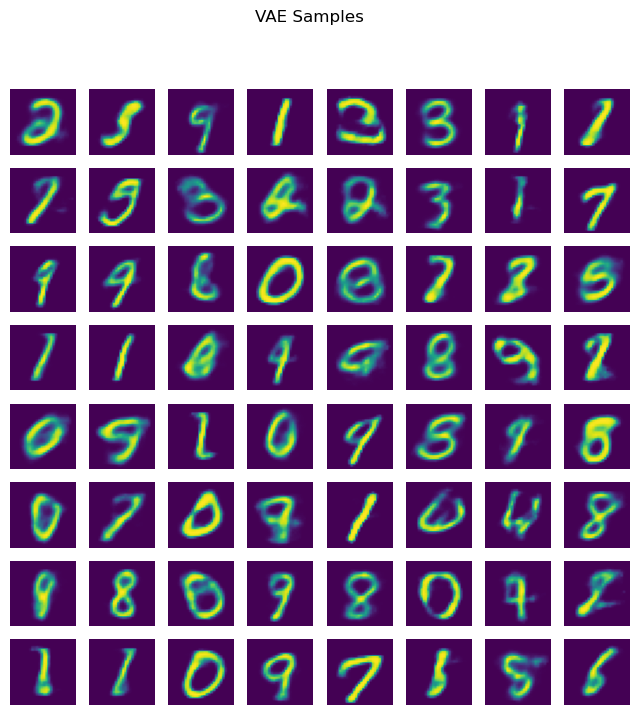

In [40]:
input_dim = 784
latent_dim = 20
batch_size = 64
img_shape = (28, 28)

vae = models.VAE(input_dim, latent_dim)
vae.load_state_dict(torch.load("./models/VAE.pth"))

get_samples(model=vae.decode,
            latent_dim=latent_dim,
            output_dim=input_dim,
            name="VAE", 
            fname="./samples/VAE_samples.png")

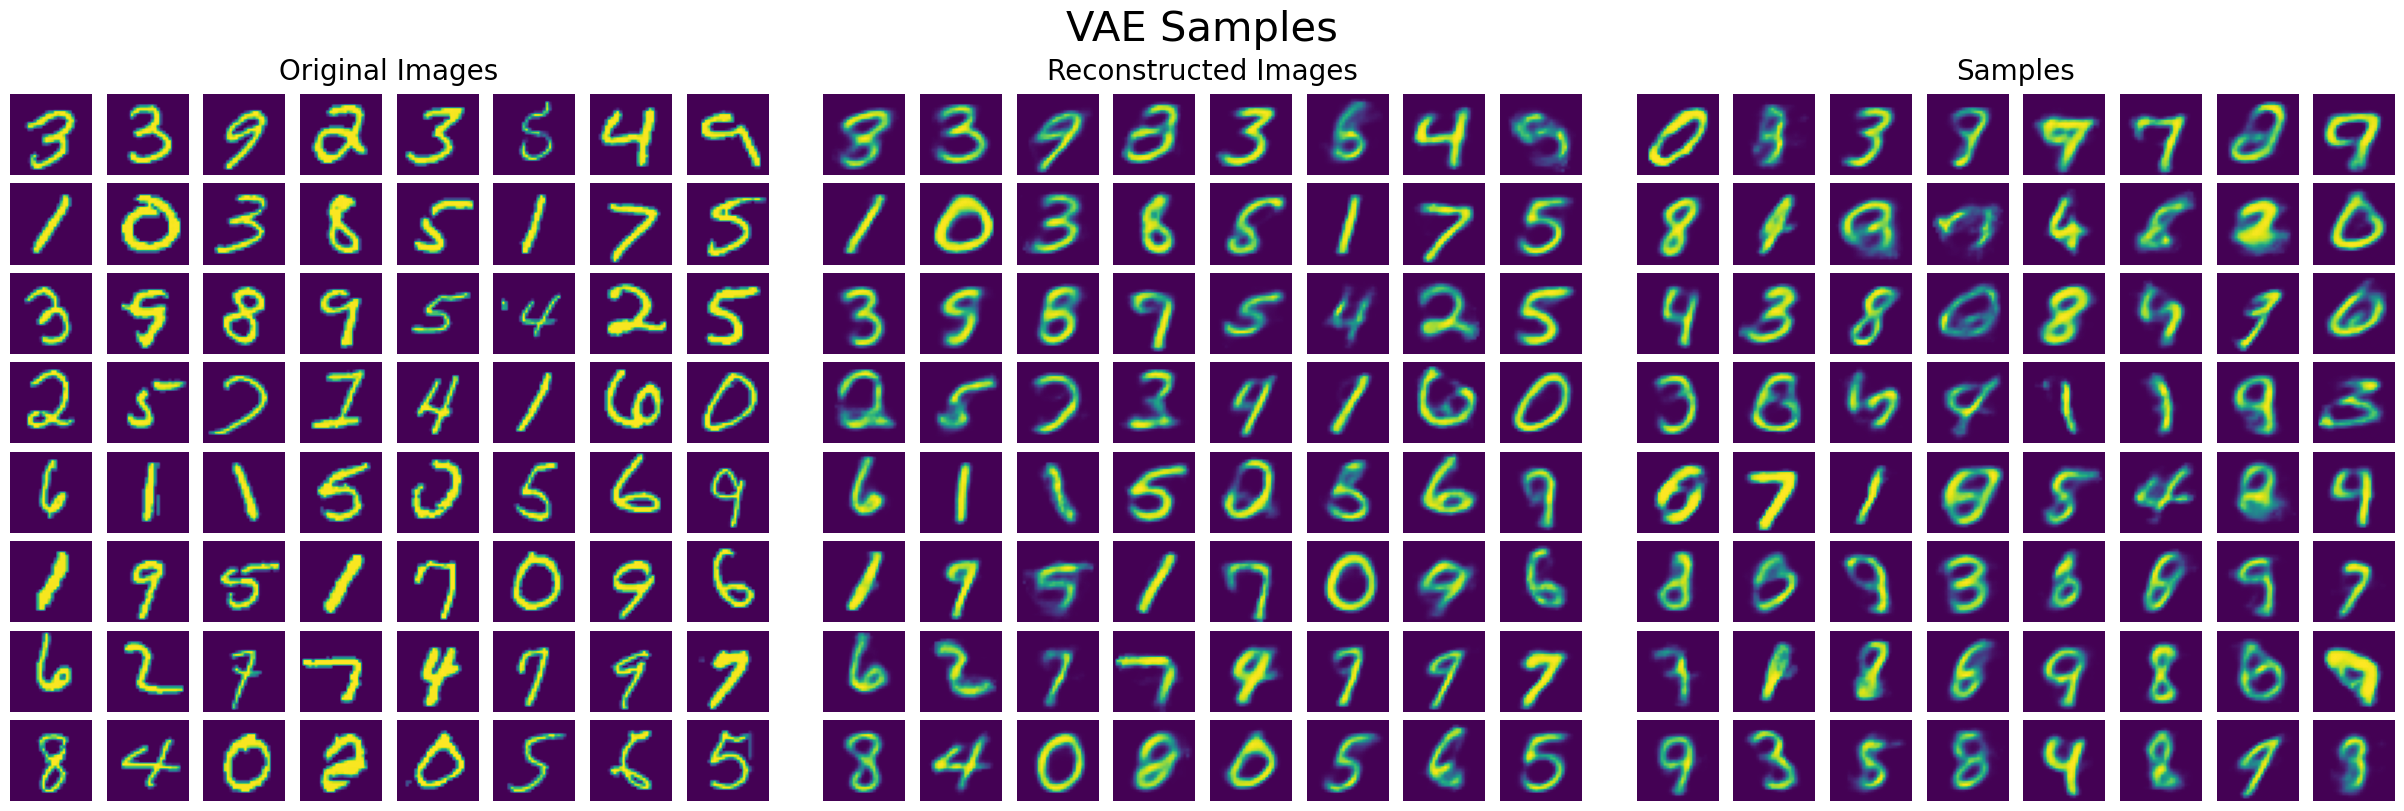

In [14]:
input_dim = 784
latent_dim = 20
batch_size = 64
img_shape = (28, 28)

vae = models.VAE(input_dim, latent_dim)
vae.load_state_dict(torch.load("./models/VAE.pth"))

data = datasets.MNIST(
    root="./", train=True, download=False, transform=ToTensor())
dataloader = DataLoader(data, batch_size=64, shuffle=True)

get_samples(model=vae,
            latent_dim=latent_dim,
            output_dim=input_dim,
            name="VAE",
            ori_imgs=next(iter(dataloader))[0],
            fname="./samples/VAE_reconstruction.png")

# GAN

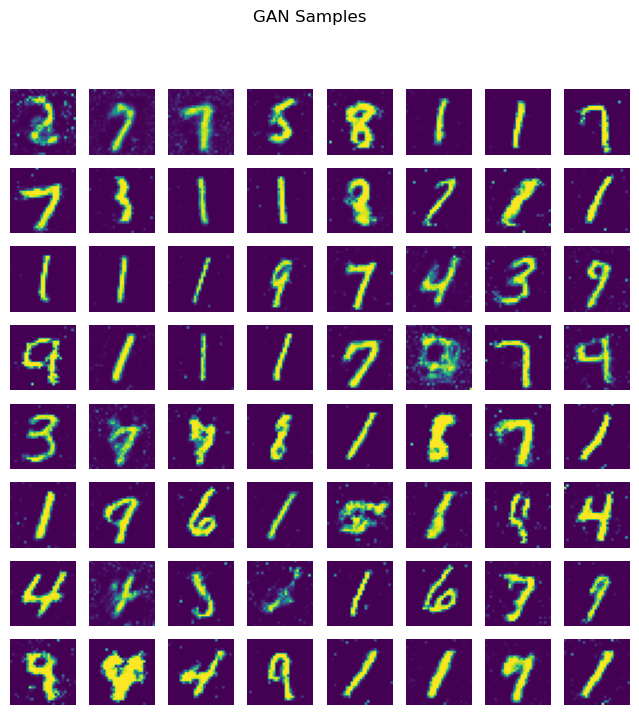

In [42]:
latent_dim = 100
output_dim = 784

generator = models.Generator(latent_dim, output_dim)
generator.load_state_dict(torch.load("./models/Generator_critic_1.pth"))

get_samples(model=generator,
            latent_dim=latent_dim,
            output_dim=output_dim,
            name="GAN", 
            fname="./samples/GAN_samples_critic_1.png")

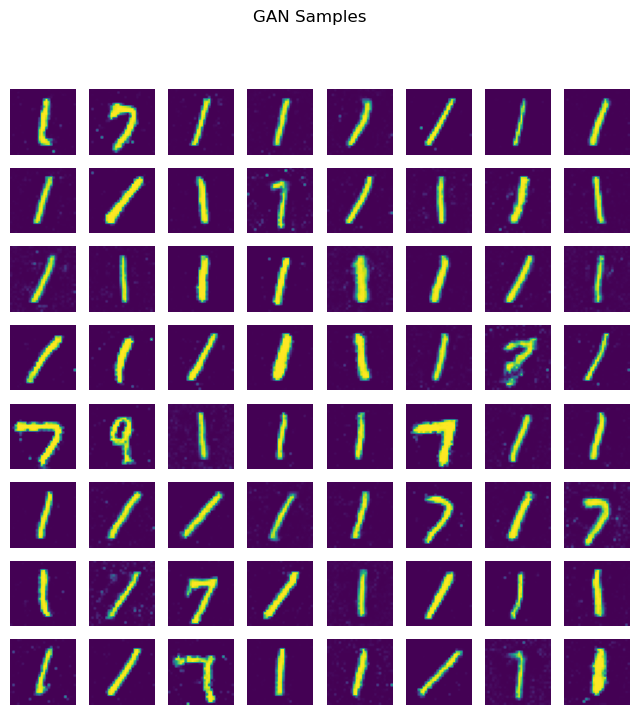

In [5]:
latent_dim = 100
output_dim = 784

generator = models.Generator(latent_dim, output_dim)
generator.load_state_dict(torch.load("./models/Generator_critic_5.pth"))

get_samples(model=generator,
            latent_dim=latent_dim,
            output_dim=output_dim,
            name="GAN", 
            fname="./samples/GAN_samples_critic_5.png")

# WGAN

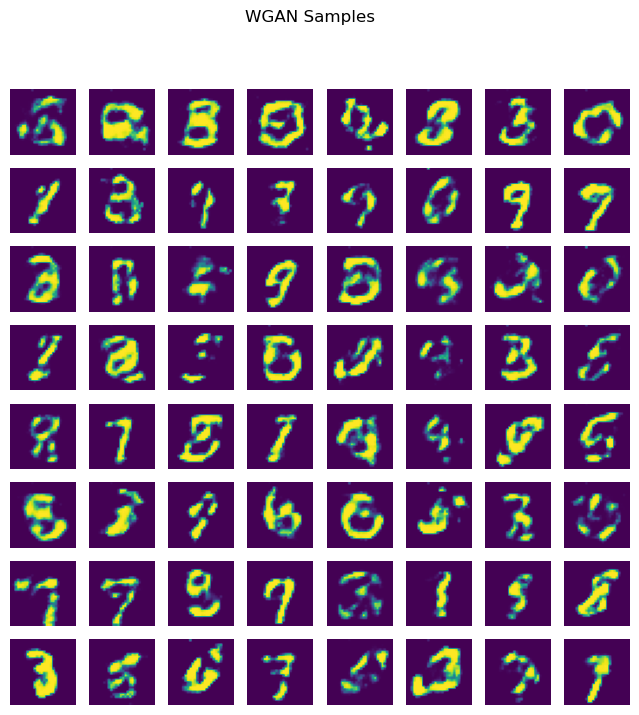

In [43]:
latent_dim = 100
output_dim = 784

W_generator = models.W_Generator(latent_dim, output_dim)
W_generator.load_state_dict(torch.load("./models/W_Generator_critic_5.pth"))

get_samples(model=W_generator,
            latent_dim=latent_dim,
            output_dim=output_dim,
            name="WGAN", 
            fname="./samples/WGAN_samples_critic_5.png")

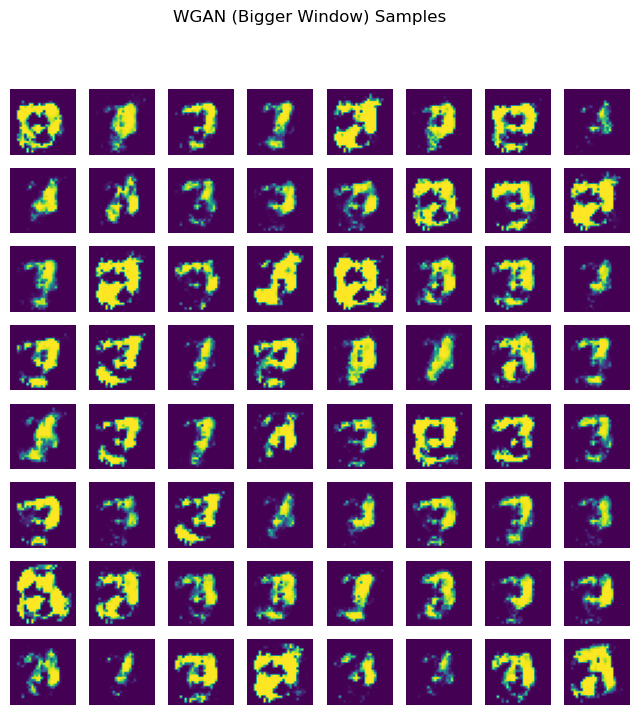

In [44]:
latent_dim = 100
output_dim = 784

W_generator = models.W_Generator(latent_dim, output_dim)
W_generator.load_state_dict(torch.load("./models/W_Generator_Bigger_Window_critic_5.pth"))

get_samples(model=W_generator,
            latent_dim=latent_dim,
            output_dim=output_dim,
            name="WGAN (Bigger Window)", 
            fname="./samples/WGAN_samples_bigger_window_critic_5.png")

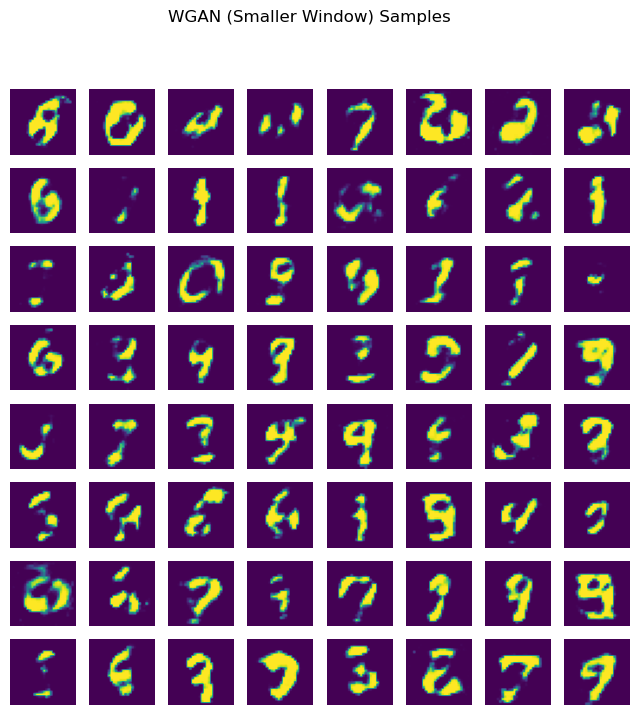

In [45]:
latent_dim = 100
output_dim = 784

W_generator = models.W_Generator(latent_dim, output_dim)
W_generator.load_state_dict(torch.load("./models/W_Generator_Smaller_Window_critic_5.pth"))

get_samples(model=W_generator,
            latent_dim=latent_dim,
            output_dim=output_dim,
            name="WGAN (Smaller Window)", 
            fname="./samples/WGAN_samples_smaller_window_critic_5.png")

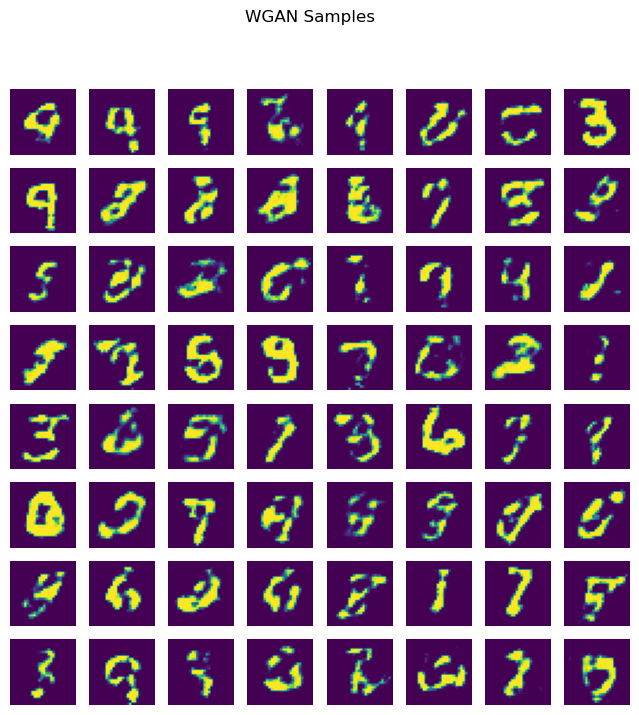

In [6]:
latent_dim = 100
output_dim = 784

W_generator = models.W_Generator(latent_dim, output_dim)
W_generator.load_state_dict(torch.load("./models/W_Generator_critic_1.pth"))

get_samples(model=W_generator,
            latent_dim=latent_dim,
            output_dim=output_dim,
            name="WGAN", 
            fname="./samples/WGAN_samples_critic_1.png")